In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
df.shape

(303, 14)

In [109]:
# Let's find the distribution of age with respect to gender
c1 = alt.Chart(df).mark_bar().encode(
    alt.X('age', bin=True, scale=alt.Scale(zero=False), title='Age'),
    alt.Y('count()'),
    alt.Color('sex:N', legend=alt.Legend(title='Gender'))
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

# Let's find count of each sex and facet these two charts
c2 = alt.Chart(df).mark_bar().encode(
    alt.X('sex:N', title='Gender'),
    alt.Y('count()', title=''),
    alt.Color('sex:N')
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

In [110]:
c1 = c1.properties(title = 'Distribution of Heart Patients by Age and Gender')
c1.configure(title = alt.VgTitleConfig(anchor='middle'))
chart = c1 | c2
chart = chart.configure_legend(titleFontSize=10)
chart = chart.configure_axis(titleFontSize=10)

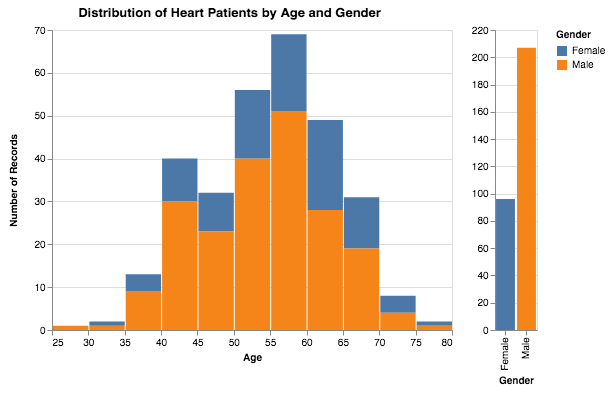

In [111]:
chart

In [112]:
alt.themes.enable('opaque')
chart.save('plots/patients_gender_age.png', scale_factor=7.0)